<a href="https://colab.research.google.com/github/jarodriguezf/Projects/blob/main/Rice_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# CONVOLUCION
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# RED NEURONAL SECUENCIAL
from tensorflow.keras.models import Sequential
# OPTIMIZADOR
from keras.optimizers import Adam
# LIBRERIAS PARA IMPORTAR Y EXPORTAR ARCHIVOS
import io
from google.colab import drive
import zipfile
import os
from PIL import Image
from IPython.display import display
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [2]:
# Especifica la ruta del archivo RAR que deseas descomprimir
ruta_archivo_zip = '/content/drive/MyDrive/imagenes_CNN/rice_detection.zip'

In [3]:
# Lee el archivo ZIP en una variable de bytes
with open(ruta_archivo_zip, 'rb') as file:
    contenido_zip = file.read()

In [4]:
# Descomprime el archivo ZIP en la variable 'imagenes'
with zipfile.ZipFile(io.BytesIO(contenido_zip), 'r') as zip_ref:
    imagenes_total = {nombre: zip_ref.read(nombre) for nombre in zip_ref.namelist()}

In [5]:
# Dividir las carpetas y imagenes segun tipo de arroz
# Especifica la ruta del directorio que contiene las carpetas con imágenes
ruta_Arborio = 'Rice_Image_Dataset/Arborio'
ruta_Basmati = 'Rice_Image_Dataset/Basmati'
ruta_Ipsala = 'Rice_Image_Dataset/Ipsala'
ruta_Jasmine = 'Rice_Image_Dataset/Jasmine'
ruta_Karacadag = 'Rice_Image_Dataset/Karacadag'

In [6]:
# Función para obtener el contenido de una lista específica, retornando el contenido de cada carpeta con imagenes
def obtener_contenido_carpeta(img_total, ruta):
    contenido_carpeta = []
    for nombre, contenido in img_total.items():
        # Verificar si la ruta coincide con la carpeta
        if nombre.startswith(ruta):
            print("Comparando:", nombre, "con", ruta)
            # Asignar el contenido a la lista
            contenido_carpeta.append(contenido)

    return contenido_carpeta

In [7]:
# Obtener el contenido de cada carpeta
carpetas_con_Arborio = obtener_contenido_carpeta(imagenes_total, ruta_Arborio)
carpetas_con_Basmati = obtener_contenido_carpeta(imagenes_total, ruta_Basmati)
carpetas_con_Ipsala = obtener_contenido_carpeta(imagenes_total, ruta_Ipsala)
carpetas_con_Jasmine = obtener_contenido_carpeta(imagenes_total, ruta_Jasmine)
carpetas_con_Karacadag = obtener_contenido_carpeta(imagenes_total, ruta_Karacadag)

Se han truncado las últimas 5000 líneas del flujo de salida.
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5499).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg con Rice_Image_Dataset/Karacadag
Comparando: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg con Rice_Image_Dataset/Ka

In [8]:
# Decodificamos las imagenes binarias a jpg
def decodificar_binarios(contenidos_carpetas):
  imagen_pil=[]
  for i in contenidos_carpetas:
    imagen_bytes = io.BytesIO(i)
    imagen_pil.append(Image.open(imagen_bytes))
  return imagen_pil

In [9]:
# Hacemos uso de la funcion decodificar
Arborio_img = decodificar_binarios(carpetas_con_Arborio)
Basmati_img = decodificar_binarios(carpetas_con_Basmati)
Ipsala_img = decodificar_binarios(carpetas_con_Ipsala)
Jasmine_img = decodificar_binarios(carpetas_con_Jasmine)
Karacadag_img = decodificar_binarios(carpetas_con_Karacadag)

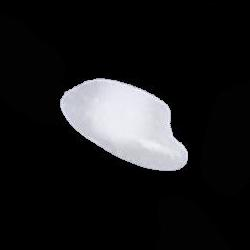

In [11]:
# Mostramos algunas imagenes para ver el resultado
if Arborio_img:
  display(Arborio_img[200])
else:
  print("La lista de imágenes está vacía.")

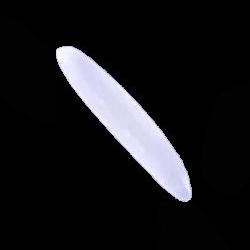

In [12]:
if Basmati_img:
  display(Basmati_img[200])
else:
  print("La lista de imágenes está vacía.")

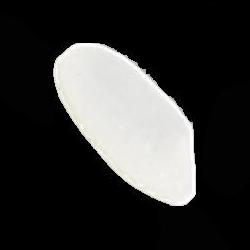

In [13]:
if Ipsala_img:
  display(Ipsala_img[200])
else:
  print("La lista de imágenes está vacía.")

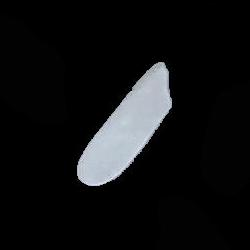

In [14]:
if Jasmine_img:
  display(Jasmine_img[200])
else:
  print("La lista de imágenes está vacía.")

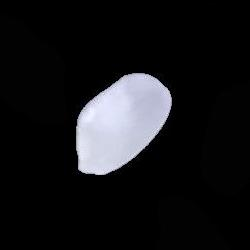

In [15]:
if Karacadag_img:
  display(Karacadag_img[200])
else:
  print("La lista de imágenes está vacía.")

In [10]:
# test split de las imagenes para el conjunto de prueba (para el entrenamiento usaremos unas pocas imagenes ya que los recursos son limitados)
training_Arborio, testing_Arborio = train_test_split(Arborio_img, test_size=0.7, random_state=42)
training_Basmati, testing_Basmati = train_test_split(Basmati_img, test_size=0.7, random_state=42)
training_Ipsala, testing_Ipsala = train_test_split(Ipsala_img, test_size=0.7, random_state=42)
training_Jasmine, testing_Jasmine = train_test_split(Jasmine_img, test_size=0.7, random_state=42)
training_Karacadag, testing_Karacadag = train_test_split(Karacadag_img, test_size=0.7, random_state=42)

In [12]:
label_Arborio = []
label_Basmati = []
label_Ipsala = []
label_Jasmine = []
label_Karacadaj = []

for i in range(4500):
  label_Arborio.append(1)

for i in range(4500):
  label_Basmati.append(2)

for i in range(4500):
  label_Ipsala.append(3)

for i in range(4500):
  label_Jasmine.append(4)

for i in range(4500):
  label_Karacadaj.append(5)

In [11]:
size_training_Arborio = len(training_Arborio)
print("Tamaño del conjunto de entrenamiento de Arborio:", size_training_Arborio)

Tamaño del conjunto de entrenamiento de Arborio: 4500


In [14]:
size_test_Arborio = len(testing_Arborio)
print("Tamaño del conjunto de testing de Arborio:", size_test_Arborio)

Tamaño del conjunto de testing de Arborio: 1500


In [13]:
training_set = []
training_set.extend(training_Arborio)
training_set.extend(training_Basmati)
training_set.extend(training_Ipsala)
training_set.extend(training_Jasmine)
training_set.extend(training_Karacadag)

In [16]:
len(training_set)

22500

In [14]:
# Unir conjunto de entrenamiento y labels
label_set = []
label_set.extend(label_Arborio)
label_set.extend(label_Basmati)
label_set.extend(label_Ipsala)
label_set.extend(label_Jasmine)
label_set.extend(label_Karacadaj)

In [15]:
len(label_set)

22500

In [17]:
# Separar en evaluacion y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(training_set,label_set, test_size=0.2, random_state=42)

In [18]:
len(X_train)

18000

In [23]:
len(X_test)

4500

In [19]:
def batch_generator(lista_imagenes, lista_etiquetas, batch_size, shuffle=True):
    num_samples = len(lista_imagenes)
    indices = np.arange(num_samples)

    while True:
          if shuffle:
            np.random.shuffle(indices)

          # Crea lotes vacíos
          batch_imagenes = list()
          batch_etiquetas = list()

          # Llena el lote con datos del generador
          for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]

            # Inicializa las listas como listas vacías
            batch_imagenes = list()
            batch_etiquetas = list()

            for idx in batch_indices:
                # Obtén una imagen y su etiqueta del generador
                imagen = lista_imagenes[idx]
                etiqueta = lista_etiquetas[idx]

                # Convierte la imagen a matriz numpy
                imagen = img_to_array(imagen)

                # Añade la imagen y su etiqueta al lote
                batch_imagenes.append(imagen)
                batch_etiquetas.append(etiqueta)

            # Convierte las listas a matrices numpy
            batch_imagenes = np.array(batch_imagenes)
            batch_etiquetas = np.array(batch_etiquetas)

            # Normaliza las imágenes
            batch_imagenes /= 255.0

            # Convierte las etiquetas a categóricas
            batch_etiquetas_categoricas = to_categorical(batch_etiquetas, num_classes=6)

            yield batch_imagenes, batch_etiquetas_categoricas

In [172]:
generador_train = batch_generator(X_train, y_train, batch_size=32,shuffle=True)
generador_test = batch_generator(X_test, y_test, batch_size=32,shuffle=True)

In [173]:
# Obtener un lote del generador
batch_imagenes, batch_etiquetas_categoricas = next(generador_train)

In [174]:
# Imprimir las formas para generador_train
print(f'Forma de las imágenes: {batch_imagenes.shape}')
print(f'Forma de las etiquetas: {batch_etiquetas_categoricas.shape}')

Forma de las imágenes: (32, 250, 250, 3)
Forma de las etiquetas: (32, 6)


In [175]:
# Imprimir las formas para generador_test
batch_imagenes2, batch_etiquetas_categoricas2 = next(generador_test)
print(f'Forma de las imágenes: {batch_imagenes2.shape}')
print(f'Forma de las etiquetas: {batch_etiquetas_categoricas2.shape}')

Forma de las imágenes: (32, 250, 250, 3)
Forma de las etiquetas: (32, 6)


In [20]:
# Arquitectura de la red convolucional
input_shape = (250, 250, 3)
num_classes = 6

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 flatten (Flatten)           (None, 123008)            0

In [21]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
# Definir el número de pasos por época y el número de épocas
num_samples = len(X_train)
batch_size = 20
num_epochs = 2
steps_per_epoch = num_samples // batch_size

# Entrenar el modelo
history = model.fit_generator(
    batch_generator(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=batch_generator(X_test, y_test, batch_size=batch_size, shuffle=True),
    validation_steps=len(X_test) // batch_size
)

Epoch 1/2


<ipython-input-22-72687c970e39>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


900/900 [==============================] - 72s 67ms/step - loss: 0.2205 - accuracy: 0.9253 - val_loss: 0.0972 - val_accuracy: 0.9689
Epoch 2/2
900/900 [==============================] - 52s 58ms/step - loss: 0.1057 - accuracy: 0.9666 - val_loss: 0.1097 - val_accuracy: 0.9660


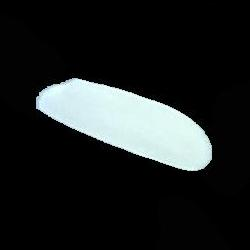

In [55]:
# Prediccion con conjunto de prueba (datos no visto en el entrenamiento)
new_instance=testing_Jasmine[2300]
new_instance

In [56]:
# procesamiento de imagenes para carga en modelo
new_instance = img_to_array(new_instance)
new_instance /= 255.0
new_instance = np.expand_dims(new_instance, axis=0)

print(new_instance.shape)

(1, 250, 250, 3)


In [57]:
# Realiza la predicción (probabilidades)
predictions = model.predict(new_instance)
# Obtén la etiqueta predicha(argumento mas alto)
predicted_label = np.argmax(predictions, axis=1)


# Arborio --> clase 1
# Basmati --> clase 2
# Ipsala --> clase 3
# Jasmine --> clase 4
# Karacadaj --> clase 5
print("La imagen pertenece a la clase:", predicted_label)

1/1 [==============================] - 0s 20ms/step
La imagen pertenece a la clase: [4]
